In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal

In [4]:
# original
data = {'x':["2019-12-01","2019-12-02","2019-12-03","2019-12-04","2019-12-05",
             "2019-12-06","2019-12-07","2019-12-08","2019-12-09","2019-12-10",
             "2019-12-11","2019-12-12","2019-12-13","2019-12-14","2019-12-15",
             "2019-12-16","2019-12-17","2019-12-18","2019-12-19","2019-12-20"],
        'y':[100, 110, 95, 97, 103, 114, 127, 120, 113, 119, 90, 94, 108, 101, 97, 115, 124, 102, 106, 99]
}
df = pd.DataFrame(data)

             x    y  SMA(3)  SMA(5)  SMA(7)
0   2019-12-01  100     NaN     NaN     NaN
1   2019-12-02  110     NaN     NaN     NaN
2   2019-12-03   95   101.7     NaN     NaN
3   2019-12-04   97   100.7     NaN     NaN
4   2019-12-05  103    98.3   101.0     NaN
5   2019-12-06  114   104.7   103.8     NaN
6   2019-12-07  127   114.7   107.2   106.6
7   2019-12-08  120   120.3   112.2   109.4
8   2019-12-09  113   120.0   115.4   109.9
9   2019-12-10  119   117.3   118.6   113.3
10  2019-12-11   90   107.3   113.8   112.3
11  2019-12-12   94   101.0   107.2   111.0
12  2019-12-13  108    97.3   104.8   110.1
13  2019-12-14  101   101.0   102.4   106.4
14  2019-12-15   97   102.0    98.0   103.1
15  2019-12-16  115   104.3   103.0   103.4
16  2019-12-17  124   112.0   109.0   104.1
17  2019-12-18  102   113.7   107.8   105.9
18  2019-12-19  106   110.7   108.8   107.6
19  2019-12-20   99   102.3   109.2   106.3


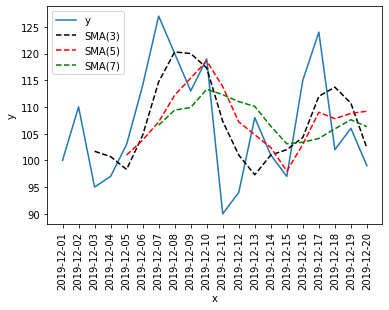

In [5]:
# SMA
df['SMA(3)'] = df['y'].rolling(3).mean().round(1)
df['SMA(5)'] = df['y'].rolling(5).mean().round(1)
df['SMA(7)'] = df['y'].rolling(7).mean().round(1)
print(df)
# visualization
plt.plot(df['x'], df['y'], label='y')
plt.plot(df['x'], df['SMA(3)'], 'k--', label='SMA(3)')
plt.plot(df['x'], df['SMA(5)'], 'r--', label='SMA(5)')
plt.plot(df['x'], df['SMA(7)'], 'g--', label='SMA(7)')
plt.xticks(rotation=90)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

             x    y  SMA(3)  SMA(5)  SMA(7)  WMA(3)  WMA(5)  WMA(7)
0   2019-12-01  100     NaN     NaN     NaN     NaN     NaN     NaN
1   2019-12-02  110     NaN     NaN     NaN     NaN     NaN     NaN
2   2019-12-03   95   101.7     NaN     NaN   100.8     NaN     NaN
3   2019-12-04   97   100.7     NaN     NaN    98.5     NaN     NaN
4   2019-12-05  103    98.3   101.0     NaN    99.7   100.5     NaN
5   2019-12-06  114   104.7   103.8     NaN   107.5   104.9     NaN
6   2019-12-07  127   114.7   107.2   106.6   118.7   112.6   110.0
7   2019-12-08  120   120.3   112.2   109.4   121.3   116.9   113.4
8   2019-12-09  113   120.0   115.4   109.9   117.7   117.1   114.3
9   2019-12-10  119   117.3   118.6   113.3   117.2   118.3   116.6
10  2019-12-11   90   107.3   113.8   112.3   103.5   108.8   110.8
11  2019-12-12   94   101.0   107.2   111.0    96.8   102.2   106.2
12  2019-12-13  108    97.3   104.8   110.1   100.3   102.5   105.4
13  2019-12-14  101   101.0   102.4   106.4   10

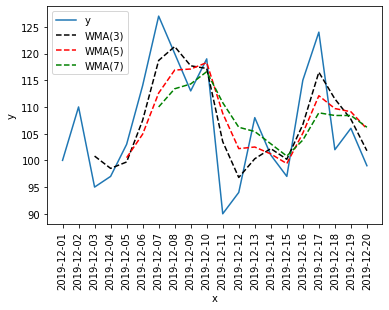

In [8]:
# WMA
def wma(y):
    weights = np.arange(len(y)) + 1
    wma = np.sum(weights * y) / weights.sum()
    return wma
df['WMA(3)'] = df['y'].rolling(3).apply(wma, raw=True).round(1)
df['WMA(5)'] = df['y'].rolling(5).apply(wma, raw=True).round(1)
df['WMA(7)'] = df['y'].rolling(7).apply(wma, raw=True).round(1)
print(df)
# visualization
plt.plot(df['x'], df['y'], label='y')
plt.plot(df['x'], df['WMA(3)'], 'k--', label='WMA(3)')
plt.plot(df['x'], df['WMA(5)'], 'r--', label='WMA(5)')
plt.plot(df['x'], df['WMA(7)'], 'g--', label='WMA(7)')
plt.xticks(rotation=90)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

             x    y  SMA(3)  SMA(5)  SMA(7)  WMA(3)  WMA(5)  WMA(7)  EMA(3)  \
0   2019-12-01  100     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1   2019-12-02  110     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2   2019-12-03   95   101.7     NaN     NaN   100.8     NaN     NaN   101.7   
3   2019-12-04   97   100.7     NaN     NaN    98.5     NaN     NaN    99.3   
4   2019-12-05  103    98.3   101.0     NaN    99.7   100.5     NaN   101.2   
5   2019-12-06  114   104.7   103.8     NaN   107.5   104.9     NaN   107.6   
6   2019-12-07  127   114.7   107.2   106.6   118.7   112.6   110.0   117.3   
7   2019-12-08  120   120.3   112.2   109.4   121.3   116.9   113.4   118.6   
8   2019-12-09  113   120.0   115.4   109.9   117.7   117.1   114.3   115.8   
9   2019-12-10  119   117.3   118.6   113.3   117.2   118.3   116.6   117.4   
10  2019-12-11   90   107.3   113.8   112.3   103.5   108.8   110.8   103.7   
11  2019-12-12   94   101.0   107.2   111.0    96.8 

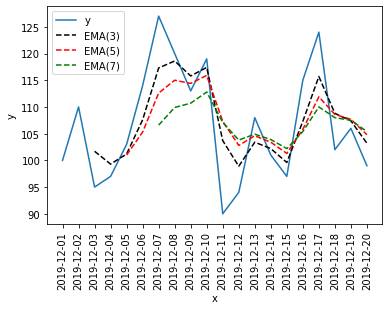

In [9]:
# EMA
def ema(y, n):
    ema = np.zeros(len(y))
    ema[:] = np.nan # initial via NAN
    ema[n-1] = y[:n].mean() # only calculate the head part via SMA
    for i in range(n, len(y)):
        ema[i] = ema[i-1] + (y[i] - ema[i-1]) / (n + 1) * 2
    return ema
df['EMA(3)'] = ema(df['y'], 3).round(1)
df['EMA(5)'] = ema(df['y'], 5).round(1)
df['EMA(7)'] = ema(df['y'], 7).round(1)
print(df)
# visualization
plt.plot(df['x'], df['y'], label='y')
plt.plot(df['x'], df['EMA(3)'], 'k--', label='EMA(3)')
plt.plot(df['x'], df['EMA(5)'], 'r--', label='EMA(5)')
plt.plot(df['x'], df['EMA(7)'], 'g--', label='EMA(7)')
plt.xticks(rotation=90)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

             x    y  SMA(3)  SMA(5)  SMA(7)  WMA(3)  WMA(5)  WMA(7)  EMA(3)  \
0   2019-12-01  100     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1   2019-12-02  110     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2   2019-12-03   95   101.7     NaN     NaN   100.8     NaN     NaN   101.7   
3   2019-12-04   97   100.7     NaN     NaN    98.5     NaN     NaN    99.3   
4   2019-12-05  103    98.3   101.0     NaN    99.7   100.5     NaN   101.2   
5   2019-12-06  114   104.7   103.8     NaN   107.5   104.9     NaN   107.6   
6   2019-12-07  127   114.7   107.2   106.6   118.7   112.6   110.0   117.3   
7   2019-12-08  120   120.3   112.2   109.4   121.3   116.9   113.4   118.6   
8   2019-12-09  113   120.0   115.4   109.9   117.7   117.1   114.3   115.8   
9   2019-12-10  119   117.3   118.6   113.3   117.2   118.3   116.6   117.4   
10  2019-12-11   90   107.3   113.8   112.3   103.5   108.8   110.8   103.7   
11  2019-12-12   94   101.0   107.2   111.0    96.8 

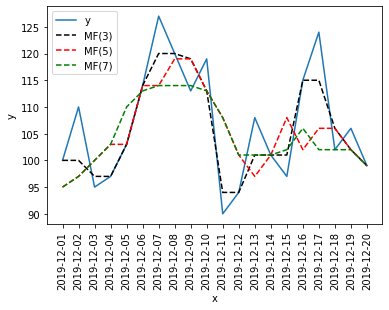

In [10]:
# MF    
df['MF(3)'] = signal.medfilt(df['y'], 3)
df['MF(5)'] = signal.medfilt(df['y'], 5)
df['MF(7)'] = signal.medfilt(df['y'], 7)
print(df)
# visualization
plt.plot(df['x'], df['y'], label='y')
plt.plot(df['x'], df['MF(3)'], 'k--', label='MF(3)')
plt.plot(df['x'], df['MF(5)'], 'r--', label='MF(5)')
plt.plot(df['x'], df['MF(7)'], 'g--', label='MF(7)')
plt.xticks(rotation=90)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

             x    y  SMA(3)  SMA(5)  SMA(7)  WMA(3)  WMA(5)  WMA(7)  EMA(3)  \
0   2019-12-01  100     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1   2019-12-02  110     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2   2019-12-03   95   101.7     NaN     NaN   100.8     NaN     NaN   101.7   
3   2019-12-04   97   100.7     NaN     NaN    98.5     NaN     NaN    99.3   
4   2019-12-05  103    98.3   101.0     NaN    99.7   100.5     NaN   101.2   
5   2019-12-06  114   104.7   103.8     NaN   107.5   104.9     NaN   107.6   
6   2019-12-07  127   114.7   107.2   106.6   118.7   112.6   110.0   117.3   
7   2019-12-08  120   120.3   112.2   109.4   121.3   116.9   113.4   118.6   
8   2019-12-09  113   120.0   115.4   109.9   117.7   117.1   114.3   115.8   
9   2019-12-10  119   117.3   118.6   113.3   117.2   118.3   116.6   117.4   
10  2019-12-11   90   107.3   113.8   112.3   103.5   108.8   110.8   103.7   
11  2019-12-12   94   101.0   107.2   111.0    96.8 

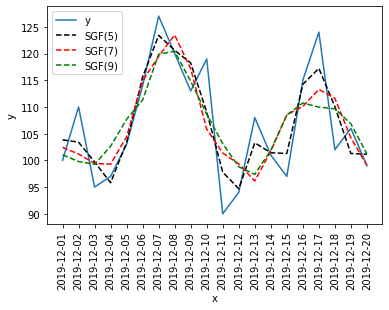

In [11]:
# SGF
k = 3 # polyorder为对窗口内数据进行k阶多项式拟合, 因此k要小于window_size
df['SGF(5)'] = signal.savgol_filter(df['y'], 5, k, mode='nearest')
df['SGF(7)'] = signal.savgol_filter(df['y'], 7, k, mode='nearest')
df['SGF(9)'] = signal.savgol_filter(df['y'], 9, k, mode='nearest')
print(df)
# visualization
plt.plot(df['x'], df['y'], label='y')
plt.plot(df['x'], df['SGF(5)'], 'k--', label='SGF(5)')
plt.plot(df['x'], df['SGF(7)'], 'r--', label='SGF(7)')
plt.plot(df['x'], df['SGF(9)'], 'g--', label='SGF(9)')
plt.xticks(rotation=90)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()